In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('./btc.csv')

# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,80.0
1,2010-07-19,0.1,0.1,0.1,0.1,570.0
2,2010-07-20,0.1,0.1,0.1,0.1,260.0
3,2010-07-21,0.1,0.1,0.1,0.1,580.0
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0


In [34]:
missing_values = data.isnull().sum()
print(missing_values)

Date      0
Open      0
High      0
Low       0
Close     0
Volume    6
dtype: int64


Phân tích phân phối của các cột 

Summary Statistics:
                Open          High           Low         Close        Volume
count   4994.000000   4994.000000   4994.000000   4994.000000  4.988000e+03
mean   10754.806948  11007.469644  10485.664638  10766.334381  1.179480e+10
std    15798.109822  16176.285768  15385.079733  15811.764818  1.785750e+10
min        0.000000      0.100000      0.000000      0.100000  8.000000e+01
25%      226.600000    231.200000    222.400000    226.900000  5.895000e+04
50%     1871.600000   1954.500000   1825.050000   1909.250000  8.604240e+08
75%    15285.850000  15834.225000  14329.425000  15321.950000  2.049945e+10
max    73079.400000  73750.100000  71334.100000  73083.500000  3.509679e+11


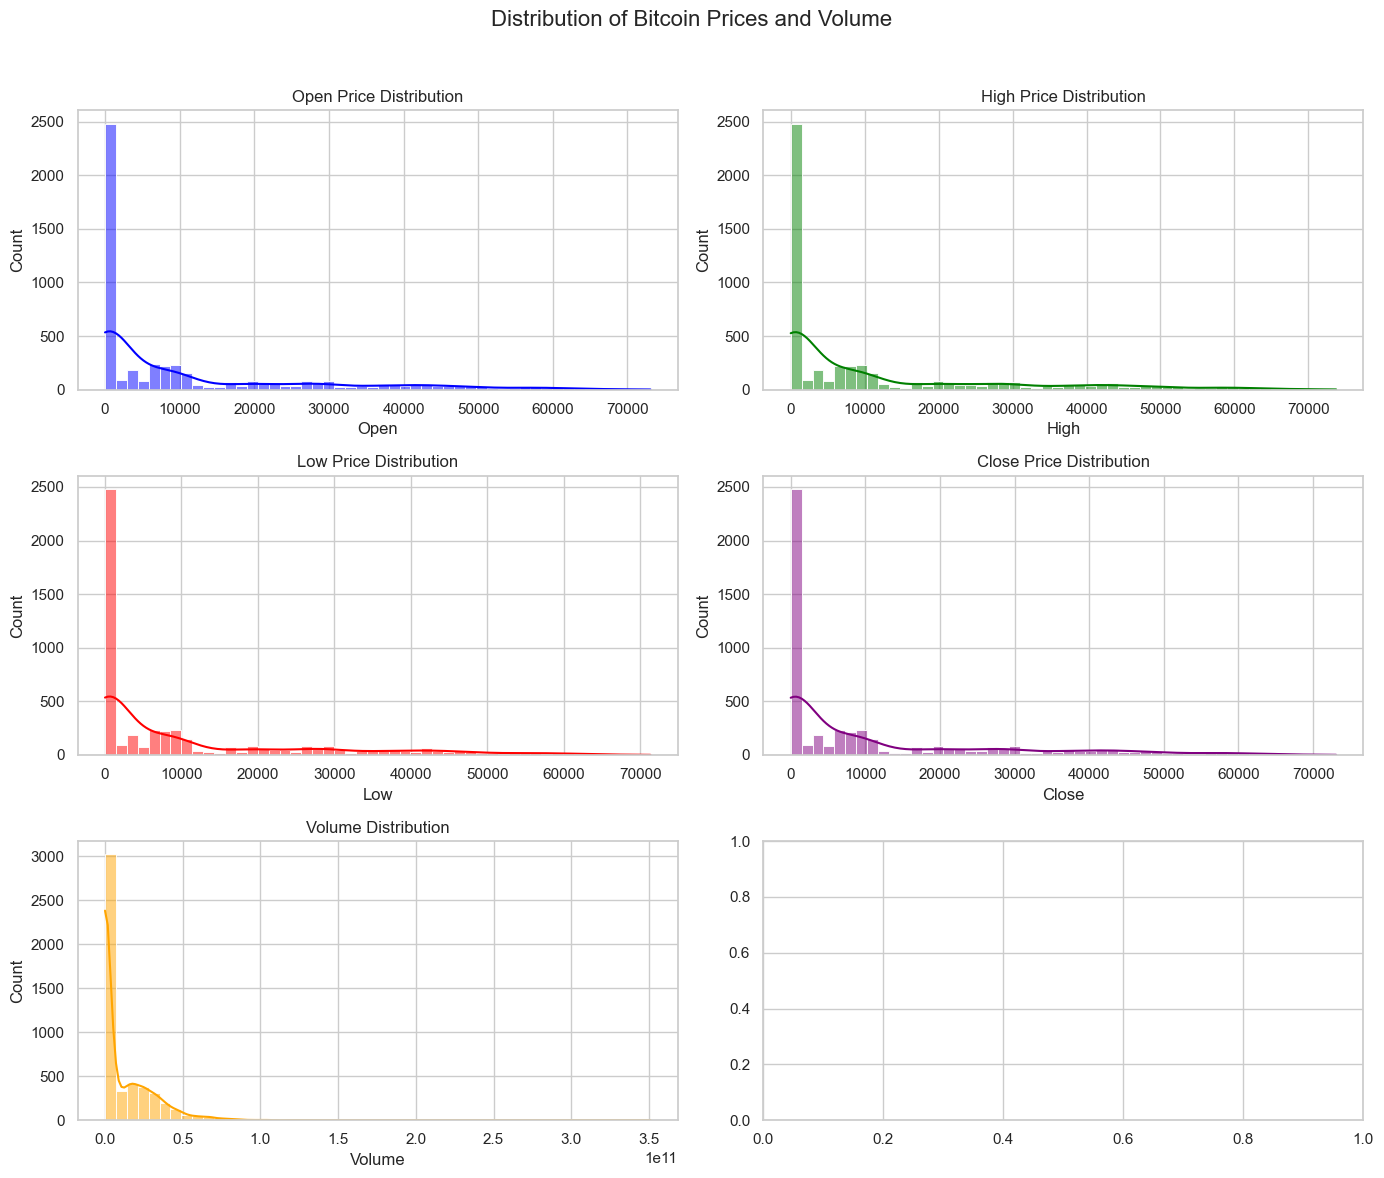

In [35]:
sns.set(style="whitegrid")

# Select only numerical columns for distribution analysis
numerical_data = data.select_dtypes(include=[np.number])

# Summary statistics for numerical columns
print("Summary Statistics:\n", numerical_data.describe())

# Histograms for distribution of each numerical column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Bitcoin Prices and Volume', fontsize=16)

sns.histplot(data=numerical_data, x='Open', bins=50, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Open Price Distribution')

sns.histplot(data=numerical_data, x='High', bins=50, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('High Price Distribution')

sns.histplot(data=numerical_data, x='Low', bins=50, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Low Price Distribution')

sns.histplot(data=numerical_data, x='Close', bins=50, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Close Price Distribution')

sns.histplot(data=numerical_data, x='Volume', bins=50, kde=True, ax=axes[2, 0], color='orange')
axes[2, 0].set_title('Volume Distribution')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Xu hướng giá chung của bitcoin

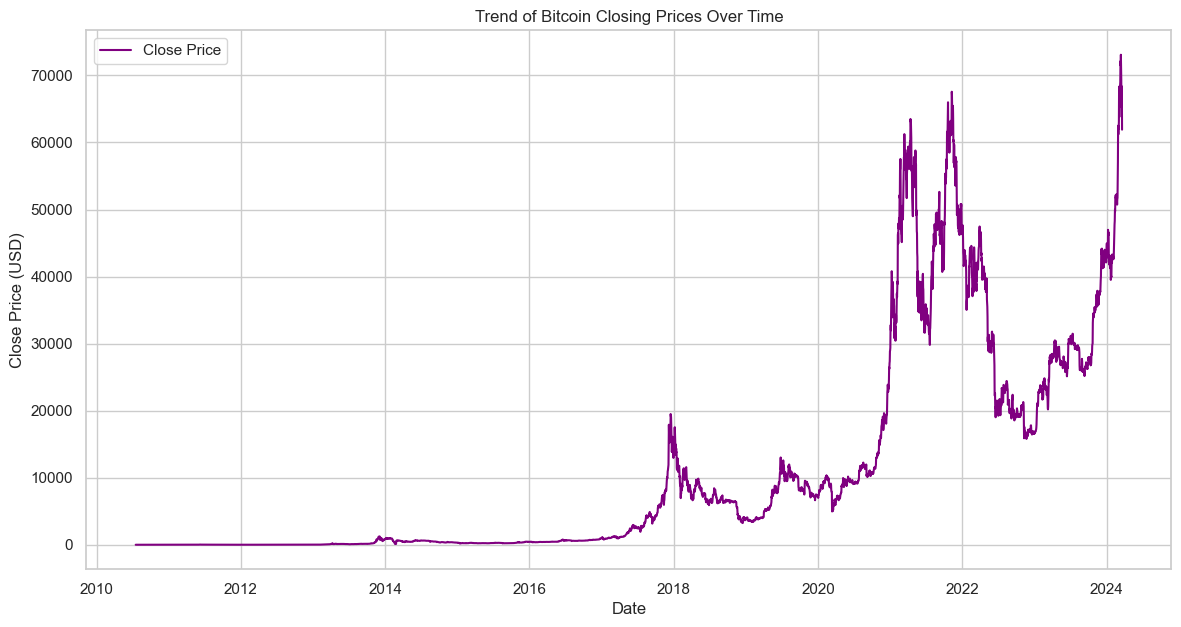

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index of the dataframe
data.set_index('Date', inplace=True)

# Plotting the overall trend of Bitcoin prices using a line chart
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='purple')
plt.title('Trend of Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Xác định các giai đoạn thay đổi 

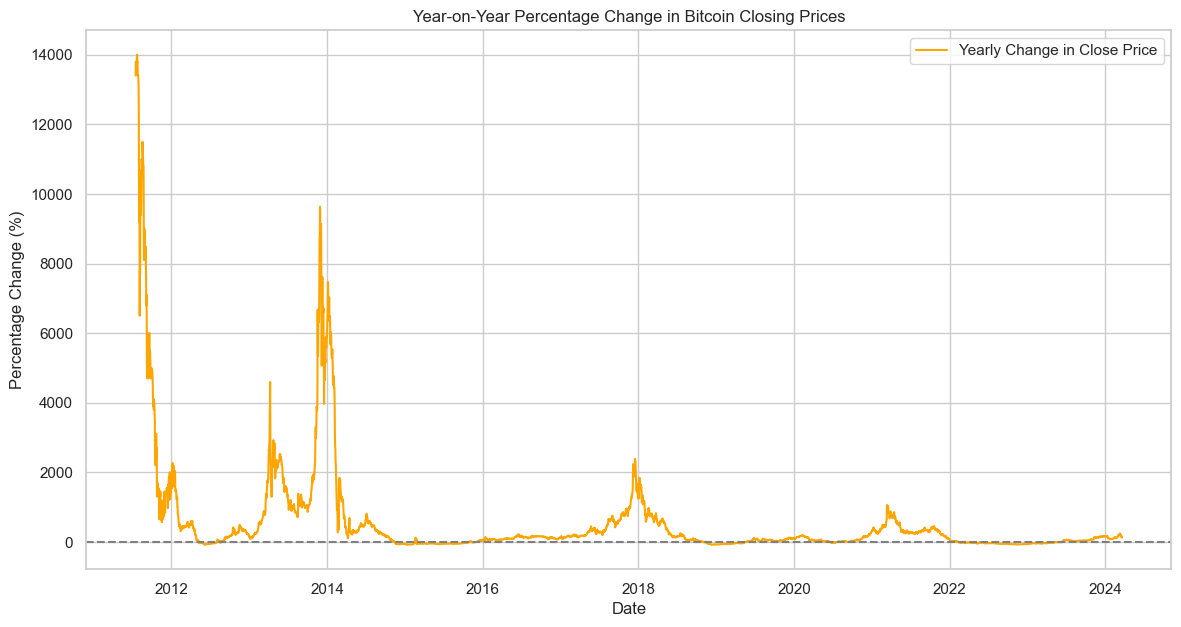

In [37]:
# Identifying significant periods of change
# We will look at the year-on-year percentage change to spot significant movements
data['Yearly Change'] = data['Close'].pct_change(365) * 100  # Calculate the percentage change year-on-year

# Plotting the yearly percentage change
plt.figure(figsize=(14, 7))
plt.plot(data['Yearly Change'], label='Yearly Change in Close Price', color='orange')
plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at 0% change for reference
plt.title('Year-on-Year Percentage Change in Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()

tính toán biến động hàng ngày(phạm vi giữa giá Cao và Thấp)

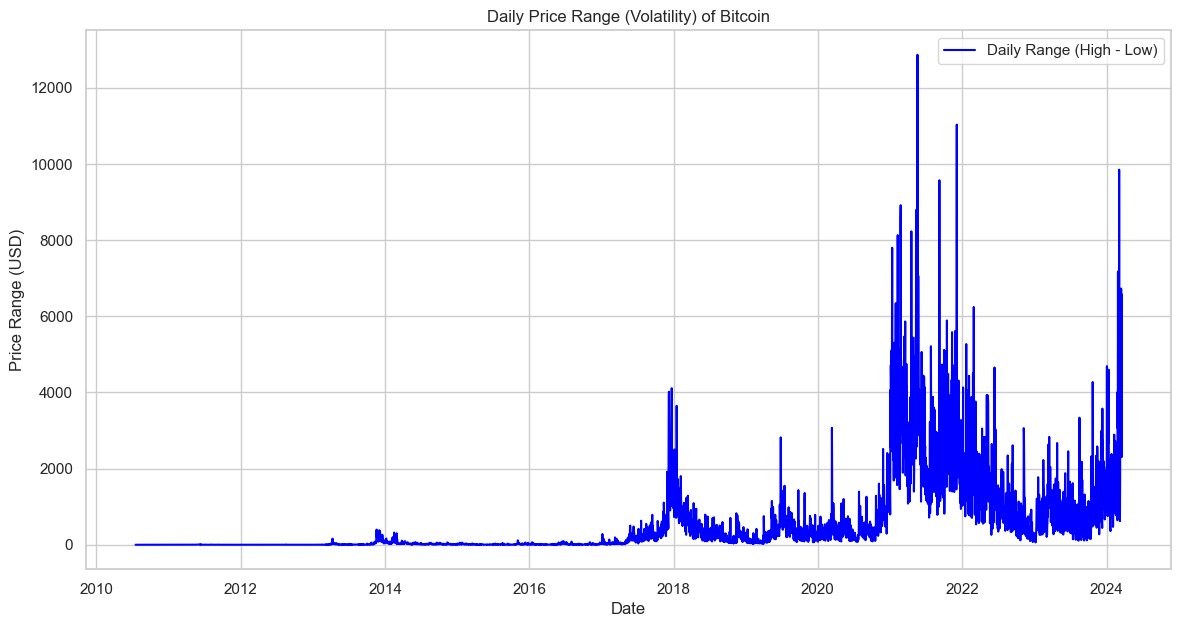

In [38]:
data['Daily Range'] = data['High'] - data['Low']

#Calculate rolling standard deviation for 7-day and 30-day windows
data['Rolling Std 7'] = data['Close'].rolling(window=7).std()
data['Rolling Std 30'] = data['Close'].rolling(window=30).std()

# Plotting the daily range to visualize daily volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Daily Range'], label='Daily Range (High - Low)', color='blue')
plt.title('Daily Price Range (Volatility) of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.legend()
plt.grid(True)
plt.show()



Vẽ độ lệch chuẩn lăn để hình dung xu hướng biến động theo thời gian

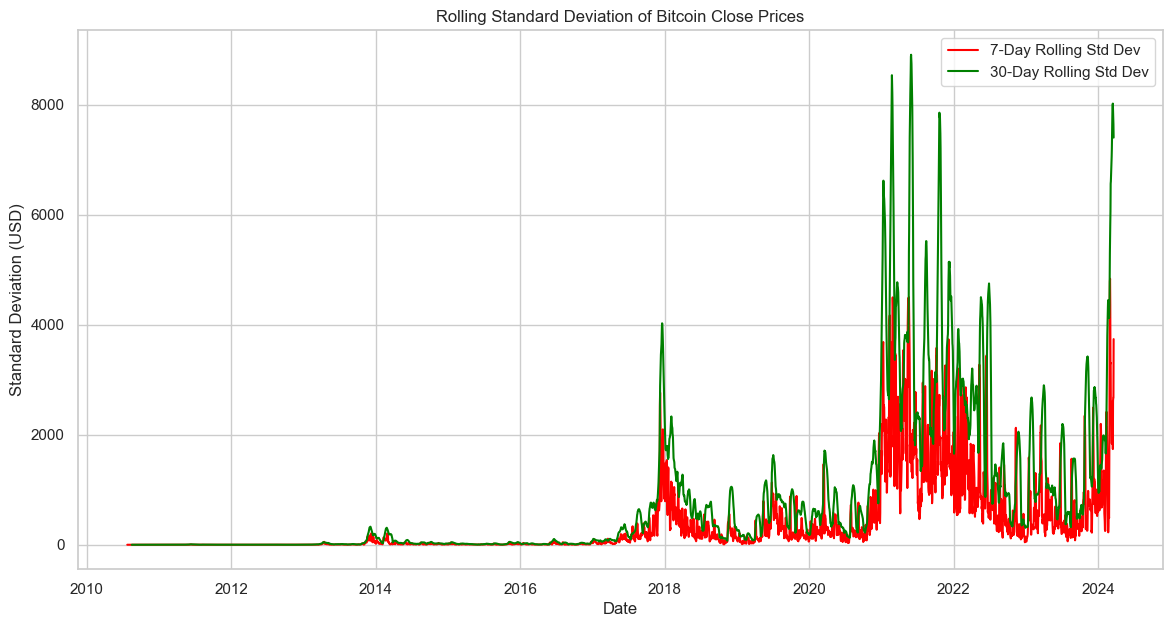

In [39]:
# Plotting rolling standard deviations to visualize trends in volatility over time
plt.figure(figsize=(14, 7))
plt.plot(data['Rolling Std 7'], label='7-Day Rolling Std Dev', color='red')
plt.plot(data['Rolling Std 30'], label='30-Day Rolling Std Dev', color='green')
plt.title('Rolling Standard Deviation of Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (USD)')
plt.legend()
plt.grid(True)
plt.show()

biến động theo mùa

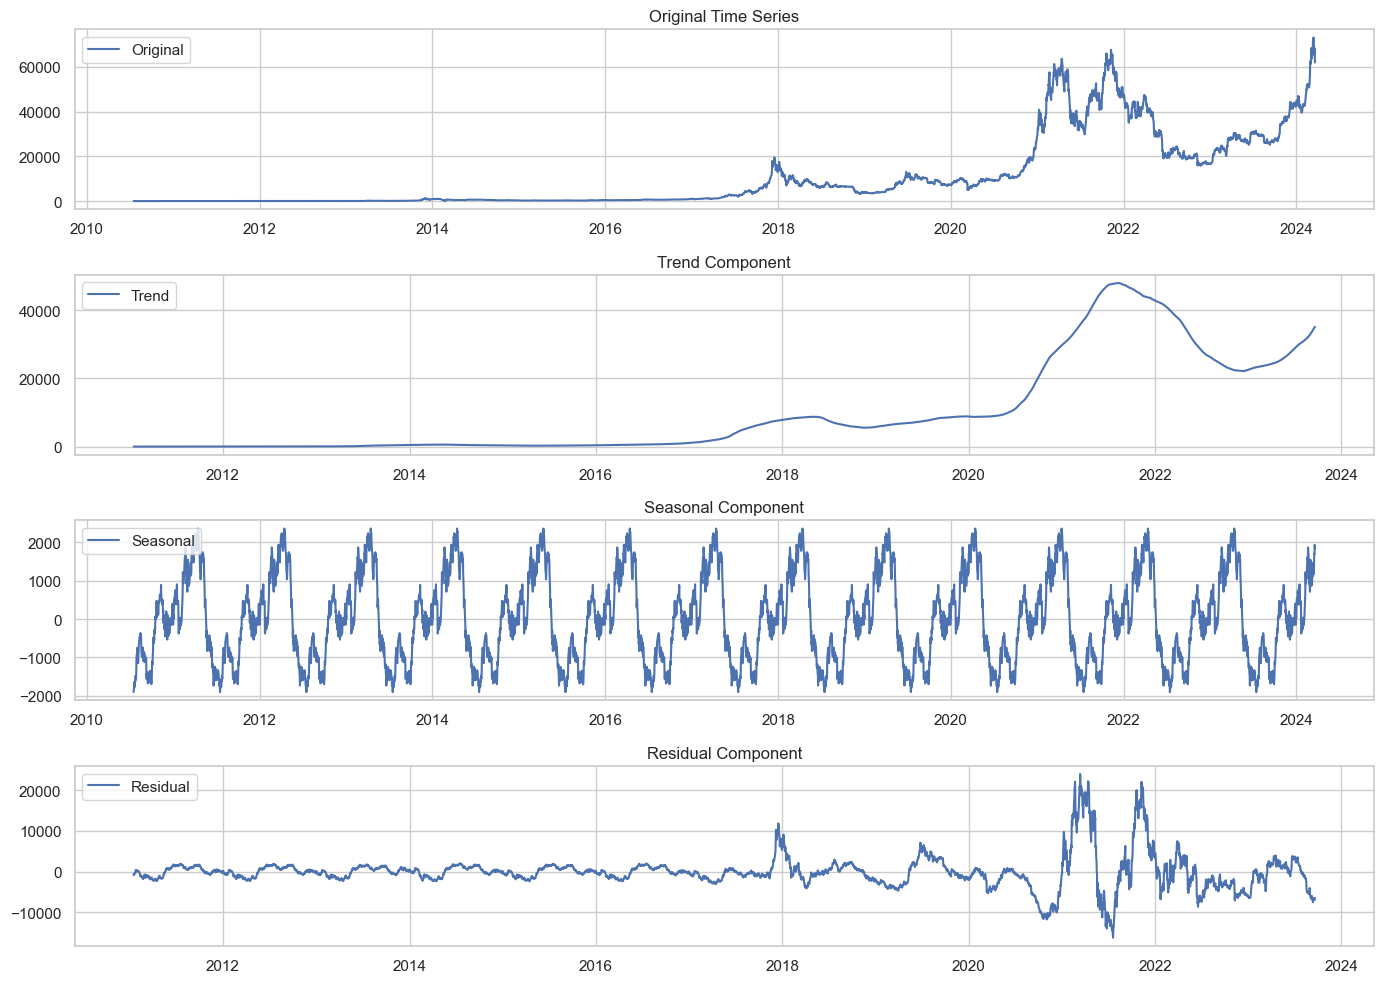

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=365)

# Vẽ các thành phần bị phân hủy của chuỗi thời gian 
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

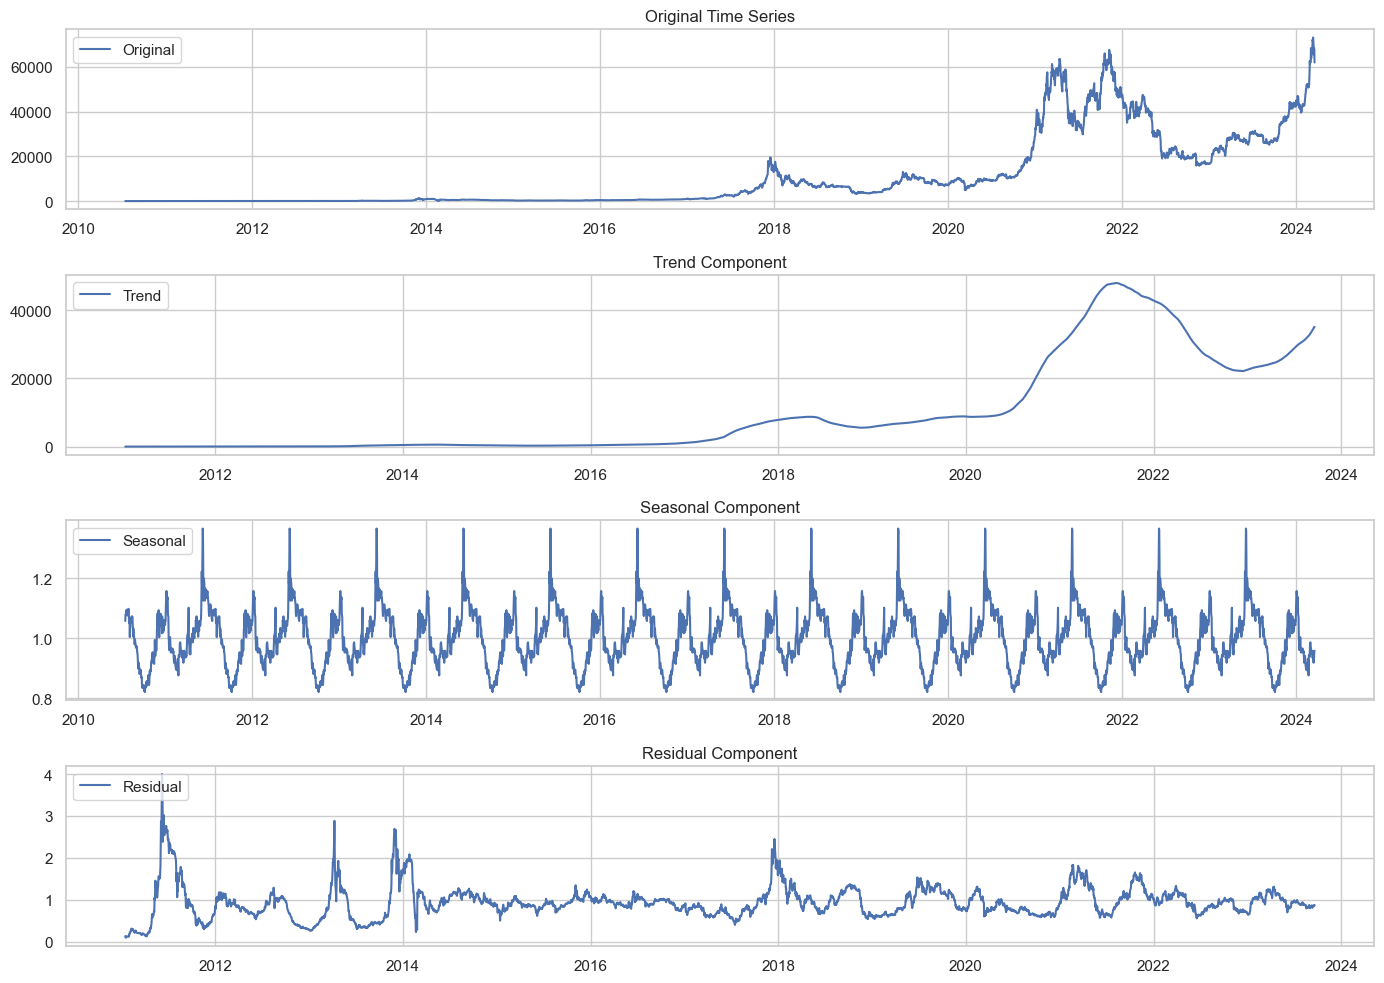

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Vẽ các thành phần bị phân hủy của chuỗi thời gian 
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Mô hình XGBoost 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Prepare the data for modeling
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse)

RMSE: 406.186


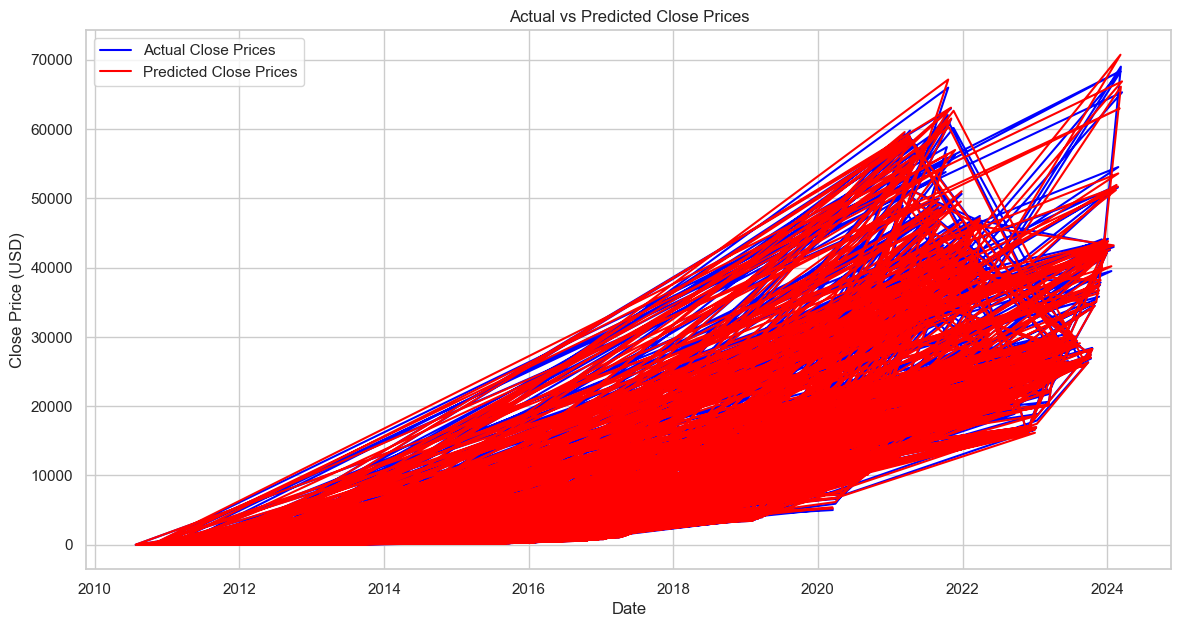

In [43]:
# Plot the actual vs predicted values for better visualization
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

LSTM 

In [44]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [45]:
values = data['Close'].values.reshape(-1, 1)

In [46]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

In [47]:
sequence_length = 50  # Number of previous time steps to use as input
X, y = create_sequences(scaled_values, sequence_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


C:\Users\T3DCOMPUTER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 6.0629e-04 - val_loss: 0.0015
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.2848e-04 - val_loss: 0.0013
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 4.6932e-04 - val_loss: 9.6566e-04
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 5.4413e-04 - val_loss: 7.9471e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.9463e-04 - val_loss: 8.4481e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 3.4714e-04 - val_loss: 7.2020e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0302e-04 - val_loss: 7.9351e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.0345e-04 - val_loss: 6.8585e-04
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.9259e-04 - val_loss: 0.0014
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1393e

In [48]:
# Predict on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


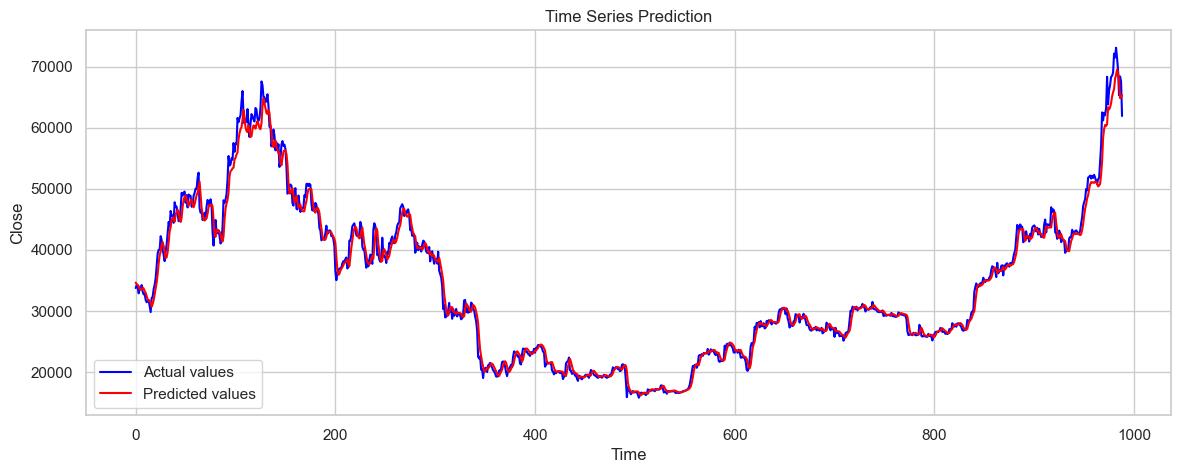

In [49]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(actual_values, color='blue', label='Actual values')
plt.plot(predictions, color='red', label='Predicted values')
plt.title('Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1424.8668106655296


PROPHET

In [51]:
from prophet import Prophet
df = data.copy()
df.reset_index(inplace=True)
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
# Next the data is split as usual
X = df
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Initialize and train the XGBoost regressor
models = Prophet()
models.fit(train)

future = models.make_future_dataframe(periods=len(test), freq='D')
forecasting = models.predict(future)
# prediction is stored and RMSE is returned
y_true = test['y'].values
y_pred1 = forecasting.yhat.values[-len(test):]
rmse = np.sqrt(mean_squared_error(y_true, y_pred1))
print('Test RMSE: %.3f' % rmse)

22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 32892.636


In [52]:
forecasting.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-18,83.319132,-6450.388450,5384.858198,83.319132,83.319132,-709.486477,-709.486477,-709.486477,-12.676208,-12.676208,-12.676208,-696.810269,-696.810269,-696.810269,0.0,0.0,0.0,-626.167345
1,2010-07-19,83.353924,-6928.945548,5535.030805,83.353924,83.353924,-691.535454,-691.535454,-691.535454,0.494677,0.494677,0.494677,-692.030130,-692.030130,-692.030130,0.0,0.0,0.0,-608.181530
2,2010-07-20,83.388715,-6471.528656,5957.925529,83.388715,83.388715,-690.769089,-690.769089,-690.769089,-3.309825,-3.309825,-3.309825,-687.459264,-687.459264,-687.459264,0.0,0.0,0.0,-607.380374
3,2010-07-21,83.423507,-6685.436575,5590.359557,83.423507,83.423507,-682.170193,-682.170193,-682.170193,0.993848,0.993848,0.993848,-683.164041,-683.164041,-683.164041,0.0,0.0,0.0,-598.746687
4,2010-07-22,83.458298,-6414.396214,6156.134660,83.458298,83.458298,-682.225016,-682.225016,-682.225016,-3.040421,-3.040421,-3.040421,-679.184595,-679.184595,-679.184595,0.0,0.0,0.0,-598.766718


c:\Users\T3DCOMPUTER\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\T3DCOMPUTER\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


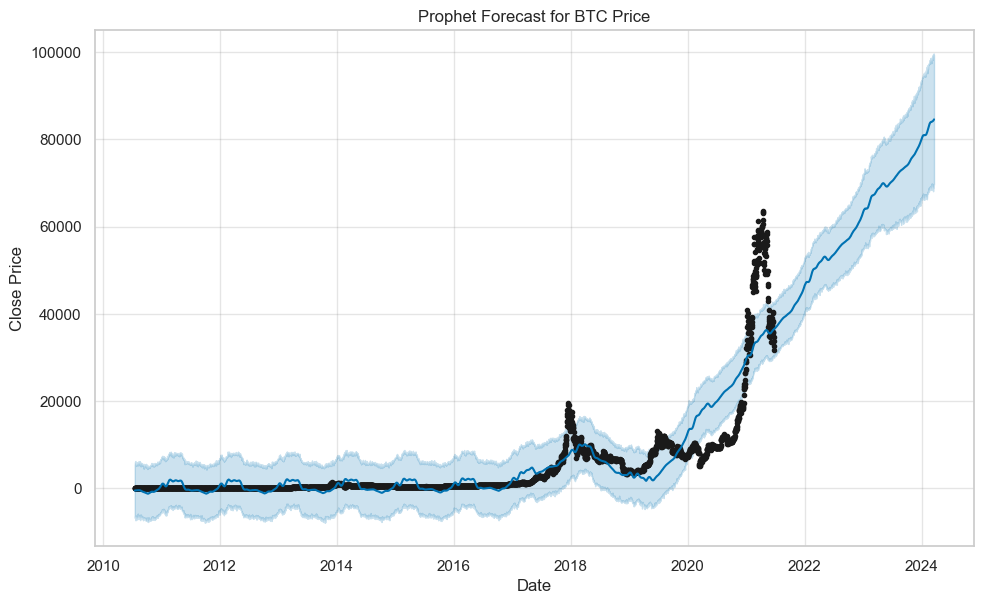

In [53]:
models.plot(forecasting)
plt.title('Prophet Forecast for BTC Price')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

## ARIMA


In [61]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

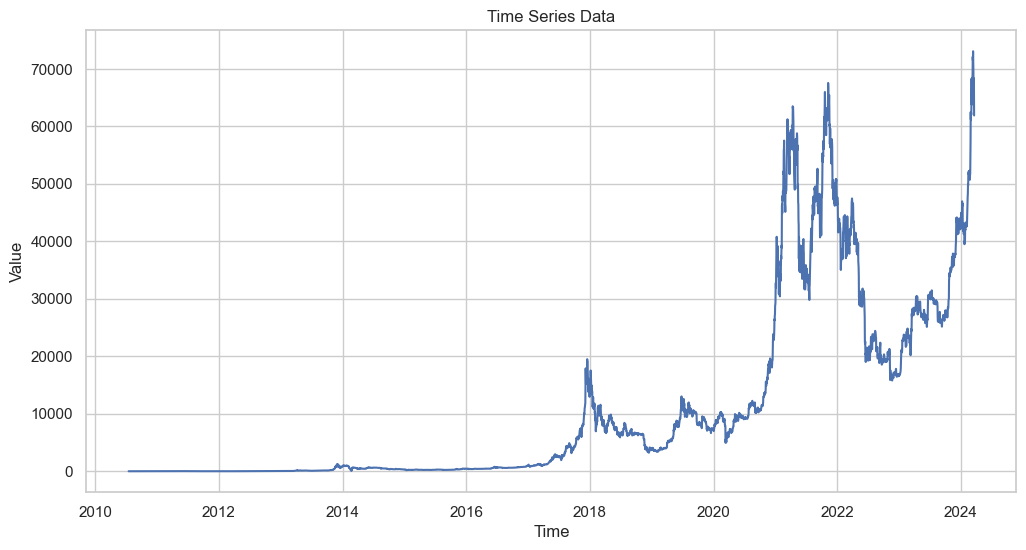

In [62]:
values = data['Close']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [63]:
# Define the size of the training set
train_size = int(len(values) * 0.8)
train, test = values[:train_size], values[train_size:]

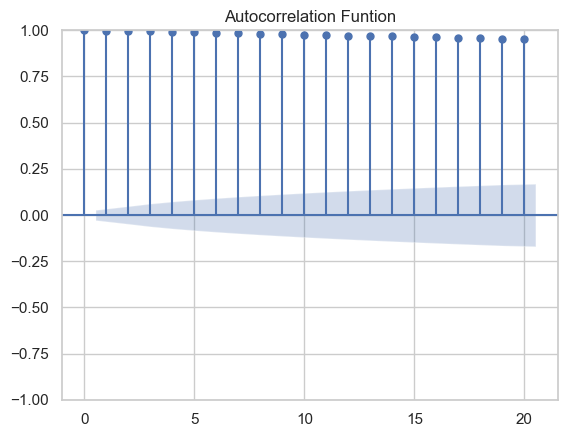

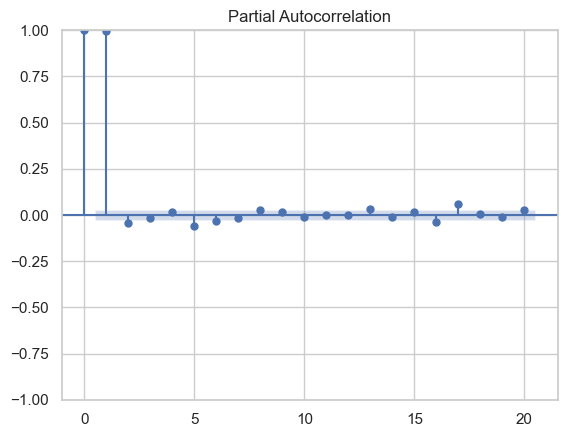

In [64]:
plot_acf(data['Close'],lags =20)
plt.title('Autocorrelation Funtion')
plt.show()

plot_pacf(data['Close'],lags =20)
plt.title('Partial Autocorrelation')
plt.show()

In [65]:
df = data['Close']

In [66]:
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.423816
p-value: 0.906046


In [80]:
model = ARIMA(data['Close'],order =(5,1,0))
model = model.fit()

# Print model summary
print(model.summary())

# Make predictions
predictions = model.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error: {rmse}')



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4994
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -39647.674
Date:                Thu, 20 Jun 2024   AIC                          79307.347
Time:                        22:20:15   BIC                          79346.442
Sample:                    07-18-2010   HQIC                         79321.050
                         - 03-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.006     -5.493      0.000      -0.045      -0.021
ar.L2          0.0189      0.006      3.145      0.002       0.007       0.031
ar.L3          0.0322      0.007      4.799      0.0

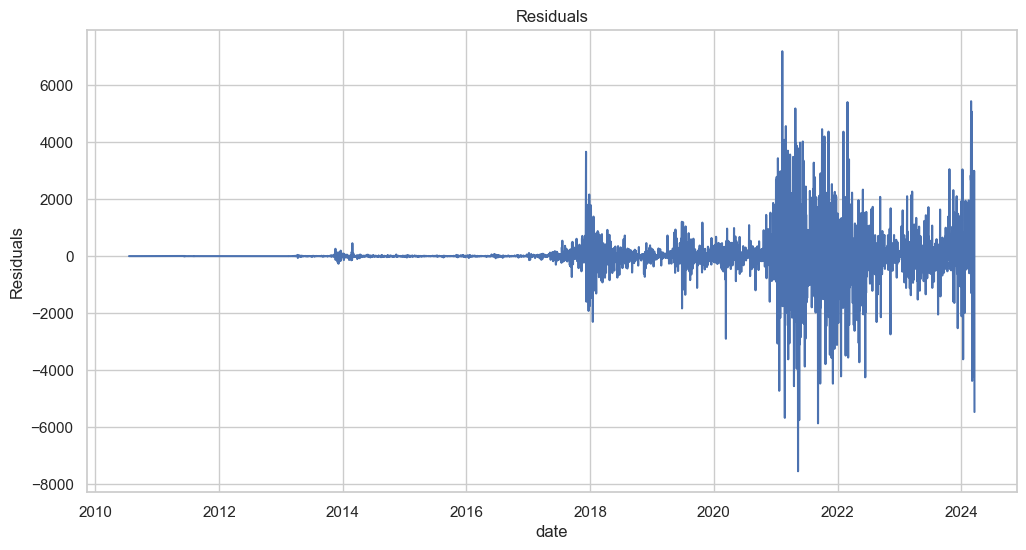

In [78]:
plt.figure(figsize = (12,6))
residuals = model.resid
plt.plot(residuals)
plt.xlabel('date')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

In [79]:
# tính lại độ do sau khi train qua mô hình ARIMA
print('ADF Statistic : %f' %adfuller(residuals)[0])
print('p-values: %f'%adfuller(residuals)[1])

ADF Statistic : -10.297727
p-values: 0.000000
